In [33]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.stats import f_oneway
import seaborn as sns

In [34]:
# Load the data from the external CSV file into a Pandas DataFrame
file_path = '../resource-pubsub.csv'  # Replace with the actual path to your CSV file
df = pd.read_csv(file_path)

labels = ['pub_py', 'pub_cpp', 'sub_py', 'sub_cpp']

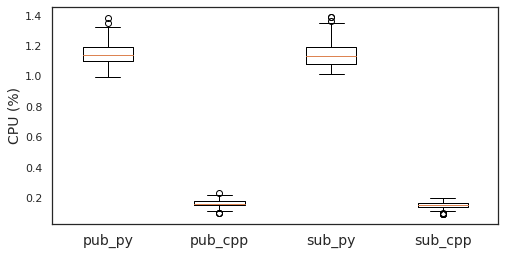

In [35]:
# CPU Usage

plt.figure(figsize=(8, 4))

data_to_plot = [df[df['label'] == label]['cpu'] for label in labels]

#plt.ylim(1.2*1e8, 1.8*1e8)

plt.boxplot(data_to_plot, labels=labels)

plt.ylabel('CPU (%)', fontsize=14)
plt.xticks(fontsize=14)

plt.savefig('figs/whisker_pubsub_cpu_usage.pdf')

plt.show()

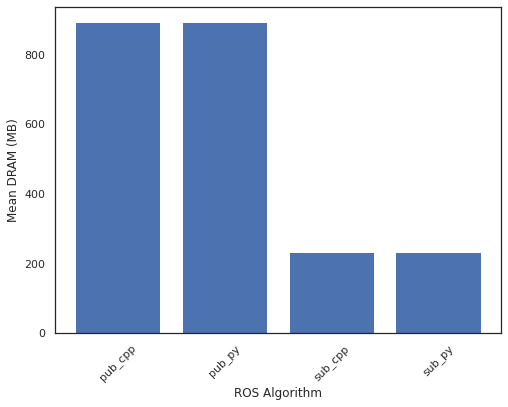

In [36]:
# DRAM Usage

# Calculate the mean 'mem' values for each 'label'
mean_mem = df.groupby('label')['mem'].mean().reset_index()

plt.figure(figsize=(8, 6))
plt.xlabel('ROS Algorithm')
plt.ylabel('Mean DRAM (MB)')
plt.xticks(rotation=45)

labels = mean_mem['label']
data_to_plot = mean_mem['mem']

plt.bar(labels, data_to_plot)

#plt.ylim(1.5e7, 4e7)  # You can adjust the ylim as needed

plt.savefig('figs/mean_dram_pubsub.pdf')

plt.show()

In [27]:
# Statistics

mean_power_by_label = df.groupby('label')['cpu'].mean()
print(mean_power_by_label)

max_power_by_label = df.groupby('label')['cpu'].max()
print(max_power_by_label)

min_power_by_label = df.groupby('label')['cpu'].min()
print(min_power_by_label)

avg_power_by_label = df.groupby('label')['cpu'].median()
print(avg_power_by_label)

std_power_by_label = df.groupby('label')['cpu'].std()
print(std_power_by_label)

label
pub_cpp    0.160000
pub_py     1.144700
sub_cpp    0.137778
sub_py     1.144600
Name: cpu, dtype: float64
label
pub_cpp    0.21
pub_py     1.38
sub_cpp    0.20
sub_py     1.39
Name: cpu, dtype: float64
label
pub_cpp    0.10
pub_py     0.99
sub_cpp    0.09
sub_py     1.01
Name: cpu, dtype: float64
label
pub_cpp    0.16
pub_py     1.14
sub_cpp    0.14
sub_py     1.13
Name: cpu, dtype: float64
label
pub_cpp    0.028901
pub_py     0.074893
sub_cpp    0.030975
sub_py     0.086333
Name: cpu, dtype: float64


In [8]:
df.mode()

,exec,label,timestamp,cpu,mem
0,0.0,pub_py,1696851621,1.13,232.0
1,1.0,sub_py,1696851674,NaN,892.0
2,2.0,NaN,1696851727,NaN,NaN
3,NaN,NaN,1696851780,NaN,NaN
4,NaN,NaN,1696851833,NaN,NaN
...,...,...,...,...,...
98,NaN,NaN,1696856811,NaN,NaN
99,NaN,NaN,1696856864,NaN,NaN
100,NaN,NaN,1696861884,NaN,NaN
101,NaN,NaN,1696861937,NaN,NaN


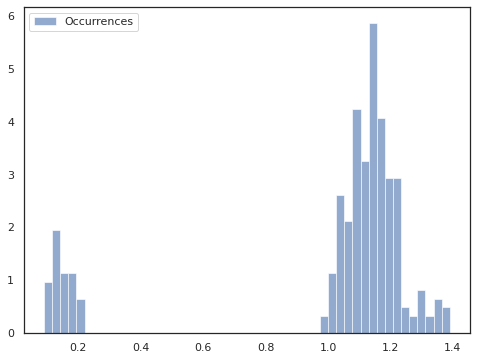

In [28]:
# Skewed Distribution Graph
data = df['cpu']

# Create a histogram to visualize the skewed distribution
plt.figure(figsize=(8, 6))
plt.hist(data, bins=50, density=True, alpha=0.6, color='b', label='Occurrences')


# Add a legend
plt.legend()

# Show the plot
plt.show()

In [29]:
pub_py_data = df[df['label'] == 'pub_py']['cpu']
pub_cpp_data = df[df['label'] == 'pub_cpp']['cpu']
sub_py_data = df[df['label'] == 'sub_py']['cpu']
sub_cpp_data = df[df['label'] == 'sub_cpp']['cpu']

In [30]:
# Perform one-way ANOVA
f_statistic, p_value = f_oneway(pub_py_data, pub_cpp_data)

In [31]:
# Perform one-way ANOVA
f_statistic, p_value = f_oneway(pub_py_data, pub_cpp_data)

# Set the significance level
alpha = 0.05

# Print the results
print(f'F-statistic: {f_statistic:.4f}')
print(f'P-value: {p_value:.4f}')

# Perform a hypothesis test
if p_value < alpha:
    print('Reject the null hypothesis: There is a significant difference between groups.')
else:
    print('Fail to reject the null hypothesis: There is no significant difference between groups.')

F-statistic: 3012.7944
P-value: 0.0000
Reject the null hypothesis: There is a significant difference between groups.


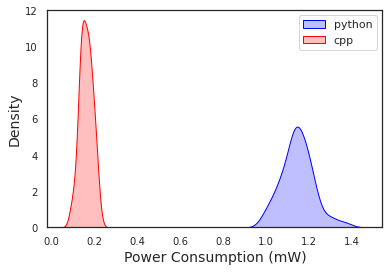

In [32]:
# Set the style for the plots (optional)
sns.set(style="white")

# Create a probability density plot (kernel density plot) for 'pub_py'
sns.kdeplot(pub_py_data, label='python', fill=True, color='blue')

# Create a probability density plot (kernel density plot) for 'pub_cpp'
sns.kdeplot(pub_cpp_data, label='cpp', fill=True, color='red')

# Add labels and a legend
plt.xlabel('Power Consumption (mW)',fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.legend()

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.savefig('figs/prob_density_pub_pw_mw.pdf')

# Show the plot
plt.show()